Análisis Exploratorio de Datos

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#librerias utilisadas


In [6]:

file_path = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/internet.xlsx"
# Ruta del archivo subido
sheets = pd.read_excel("C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/internet.xlsx", sheet_name=None)  # Cargar todas las hojas


# Cargar el archivo Excel
df = pd.ExcelFile(file_path)

# Mostrar los nombres de las hojas
df.sheet_names

for sheet_name, df in sheets.items():
    print(f"\n===== Contenido de la hoja: {sheet_name} =====")
   






===== Contenido de la hoja: Acc_vel_loc_sinrangos =====

===== Contenido de la hoja: Velocidad_sin_Rangos =====

===== Contenido de la hoja: Accesos_tecnologia_localidad =====

===== Contenido de la hoja: Velocidad % por prov =====

===== Contenido de la hoja: Totales VMD =====

===== Contenido de la hoja: Totales Accesos Por Tecnología =====

===== Contenido de la hoja: Accesos Por Tecnología =====

===== Contenido de la hoja: Penetración-poblacion =====

===== Contenido de la hoja: Penetracion-hogares =====

===== Contenido de la hoja: Penetracion-totales =====

===== Contenido de la hoja: Totales Accesos por rango =====

===== Contenido de la hoja: Accesos por rangos =====

===== Contenido de la hoja: Dial-BAf =====

===== Contenido de la hoja: Totales Dial-BAf =====

===== Contenido de la hoja: Ingresos  =====


El archivo contiene las siguientes hojas: 1. **Acc_vel_loc_sinrangos** 2. **Velocidad_sin_Rangos** 3. **Accesos_tecnologia_localidad** 4. **Velocidad % por prov** 5. **Totales VMD** 6. **Totales Accesos por Tecnología** 7. **Accesos por Tecnología** 8. **Penetración-población** 9. **Penetración-hogares** 10. **Penetración-totales** 11. **Totales Accesos por rango** 12. **Accesos por rangos** 13. **Dial-BAf** 14. **Totales Dial-BAf** 15. **Ingresos** 

las hojas que elejimos para analizar son las sig: 
**Accesos_tecnologia_localidad**: Puede brindar información sobre el acceso a internet por tecnología en distintas localidades. - 
**Velocidad % por prov**: Es útil para analizar la distribución de velocidades de internet por provincia. - 
**Penetracion-hogares / Penetracion-totales**: Indicadores de cuántos hogares y usuarios tienen acceso a internet. - 
**Totales Accesos Por Tecnología** y **Accesos Por Tecnología**: Para ver la evolución del acceso a internet según la tecnología utilizada. 
- **Ingresos**: Puede ser relevante si deseas analizar la relación entre el acceso a internet y los ingresos. 

In [7]:


# Lista de hojas que queremos analizar
sheets_to_analyze = [
    "Accesos_tecnologia_localidad",
    "Velocidad % por prov",
    "Penetracion-hogares",
    "Penetracion-totales",
    "Totales Accesos Por Tecnología",
    "Accesos Por Tecnología",
    "Ingresos "

]

# Cargar todas las hojas en un diccionario de DataFrames
xls = pd.ExcelFile(file_path)
dfs = {sheet: xls.parse(sheet) for sheet in sheets_to_analyze}

# Mostrar las primeras filas de cada hoja
for sheet, df in dfs.items():
    print(f"\n📊 **Hoja: {sheet}**")
    print(df.head())  # Muestra las primeras 5 filas
    print("\n" + "-"*50)  # Separador



📊 **Hoja: Accesos_tecnologia_localidad**
      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0

--------------------------------------------------

📊 **Hoja: Velocidad % por prov**
    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67

--------------------------------------------------

📊 **Hoja: Penet

1-analisis Accesos tecnologia localidad

In [8]:
# Seleccionar la hoja "Accesos_tecnologia_localidad"
sheet_name = "Accesos_tecnologia_localidad"
df = dfs[sheet_name]

# Análisis inicial
analysis_results = {
    "head": df.head(),  # Primeras filas
    "info": df.info(),  # Información general
    "missing_values": df.isnull().sum(),  # Valores nulos
    "duplicates": df.duplicated().sum(),  # Duplicados
    "describe": df.describe()  # Estadísticas generales
}

analysis_results


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


{'head':       Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
 0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
 1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
 2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
 3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
 4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0,
 'info': None,
 'missing_values': Provincia     0
 Partido       0
 Localidad     0
 Tecnologia    0
 Link Indec    0
 Accesos       6
 dtype: int64,
 'duplicates': np.int64(0),
 'describe':             Accesos
 count  7.747000e+03
 mean   1.491688e+03
 std    1.520174e+04
 min    0.000000e+00
 25%    3.000000e+00
 50%    5.900000e+01
 75%    4.005000e+02
 max    1.144781e+06}

esta es la informacion que contine: 
-Las columnas incluyen información sobre la provincia, partido, localidad, tipo de tecnología utilizada, un enlace a datos del INDEC y la cantidad de accesos a internet
-El dataset contiene 7,753 registros y 6 columnas
-el dataset solo contiene 6 nulos 
-presencia de valores atipicos: puede darse en zona urbanas o rurales
-el minimo lo dice que hay lugares que no hay internet
-el maximo sugiere que hay grandes cuidades que la poblacion utiliza internet
- la Mediana : lo que sugiere que la mayoría de las localidades tienen un número bajo de accesos.
-la Media :  lo que indica que hay algunas localidades con valores extremadamente altos que influyen en la media.
-Desviación estándar:  lo que sugiere una gran variabilidad en los accesos entre localidades.
-El 75% de las localidades: tienen hasta 400 accesos, lo que significa que la mayoría de los accesos están concentrados en pocas localidades con valores muy altos

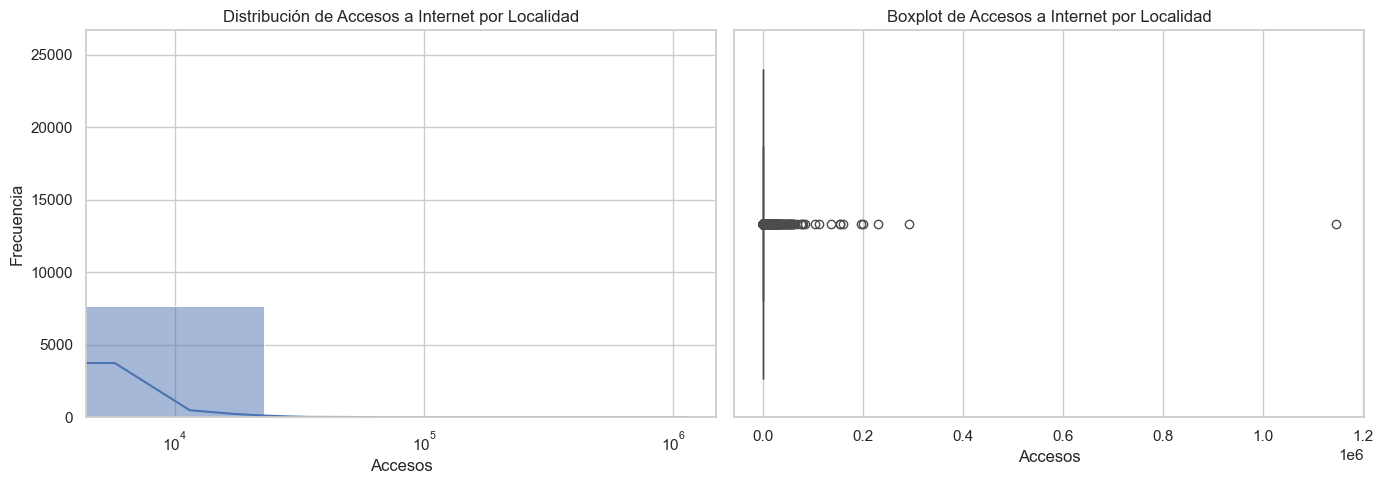

In [9]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
# Crear una figura con dos subgráficos: histograma y boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Histograma de "Accesos" (escala logarítmica para mejor visualización)
sns.histplot(df["Accesos"].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Accesos a Internet por Localidad")
axes[0].set_xlabel("Accesos")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xscale("log")  # Escala logarítmica para manejar valores extremos
# Boxplot de "Accesos"
sns.boxplot(x=df["Accesos"], ax=axes[1])
axes[1].set_title("Boxplot de Accesos a Internet por Localidad")
axes[1].set_xlabel("Accesos")
# Mostrar los gráficos
plt.tight_layout()
plt.show()

-en el primer grafico muestra la distribucion del acessos a internet por localidad muestra una alta concetracion en pocas localidades,con una disminución exponencial en la frecuencia de accesos a medida que aumenta el número de la localidad. Esto sugiere una brecha digital significativa entre las localidades con mayor y menor acceso a Internet.
-en el segundo grafico muestra diagrama de caja de los accesos a Internet por localidad.  
* Dispersión: Existe una gran dispersión en la cantidad de accesos a Internet entre las diferentes localidades, lo que sugiere una distribución desigual del acceso a Internet.
 * Valores atípicos: Se observan valores atípicos en el extremo superior, lo que indica que algunas localidades tienen una cantidad de accesos a Internet significativamente mayor que el resto.
 * Mediana: La mediana de los accesos a Internet se encuentra relativamente baja, lo que sugiere que la mayoría de las localidades tienen una cantidad de accesos a Internet inferior al promedio

2. Velocidad % por prov

# Cargar la hoja "Velocidad % por prov"
df = pd.read_excel(file_path, sheet_name="Velocidad % por prov")

# Mostrar las primeras filas del DataFrame
df.head()


 Inspección inicial del dataset
Voy a analizar las hojas más relevantes, revisando su estructura y contenido. Esto incluirá:

Ver las primeras filas (.head()).
Identificar tipos de datos (.info()).
Detectar valores nulos y duplicados (.isnull().sum() y .duplicated().sum()).
Obtener estadísticas generales (.describe()).
2. Limpieza de datos
Dependiendo de la inspección inicial, realizaría:

Eliminación o imputación de valores nulos.
Conversión de tipos de datos si es necesario (fechas, números, categorías).
Normalización de nombres de columnas para facilitar el análisis.
3. Análisis exploratorio con visualizaciones
Aquí utilizaría gráficos para entender mejor los datos:

Distribución de accesos por tecnología/localidad → Gráfico de barras o mapas.
Velocidades de internet en cada provincia → Boxplots o histogramas.
Evolución del acceso a internet en el tiempo → Gráfico de líneas.
Penetración de internet por hogares y población → Mapas de calor o gráficos de dispersión.
Relación entre ingresos y acceso a internet → Diagramas de dispersión o correlaciones.
4. Generación de KPIs
Según los objetivos del análisis, se pueden calcular métricas como:

Penetración de internet (%) = (Accesos a internet / Población total) * 100.
Crecimiento del acceso a internet en los últimos años.
Comparación de velocidades de internet por región.
Evolución del acceso por tecnología (fibra óptica, ADSL, etc.).
5. Preparación de datos para el dashboard
Si necesitas crear un dashboard interactivo, el siguiente paso sería estructurar los datos de manera óptima, seleccionando las variables más relevantes.